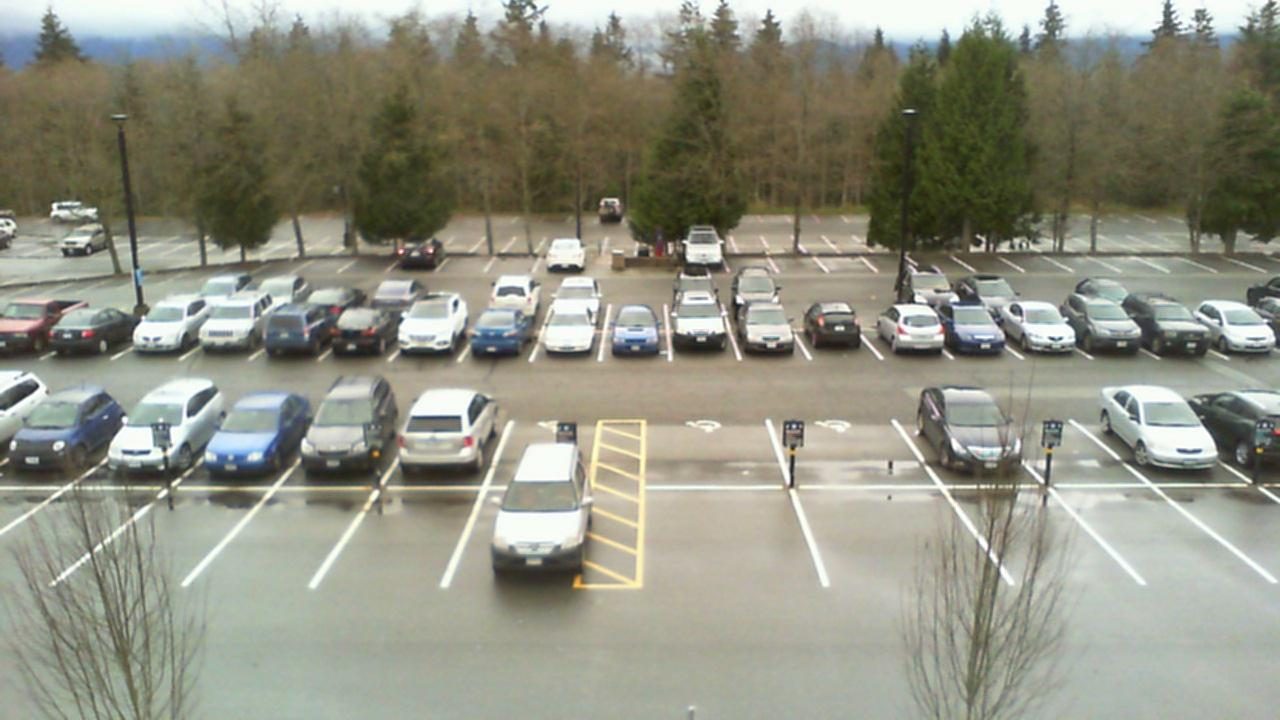

In [6]:
# Import Pillow:
from PIL import Image

actual_image_name = "rawsfu\\11-24 08.27.40.jpg"
image_name_L1 = "L1.jpg"
image_name_L1 = "L1_R.jpg"
image_name_L1_L = "L3R.jpg"
image_name_L3 = "L3.jpg"
# Load the original image:
img = Image.open(actual_image_name)
imgL1 = img
#imgL1 = imgL1.rotate(90)
imgL1.save("images\\"+image_name_L1_L)


        
from IPython.display import Image
Image("images\\"+image_name_L1_L)

In [5]:
from PIL import Image
from shutil import copyfile
import os

def split_sfu_image(input_path,image_name, map_file_name, output_folder, extension, identifier):
    
    img = Image.open(input_path+image_name+"."+extension)
    
    #print(fileL1_L)
    points = []
    with open(map_file_name) as fp:
        count = 1
        for line in fp:
            coors = line.split(",")
            coors = (int(coors[0]), int(coors[1]), int(coors[2]), int(coors[3]))
            img.crop(coors).save(output_folder+image_name+identifier+str(count)+"."+extension)
            count += 1

def split_all_sfu_images(actual_image_name, input_image_path, input_map_path ,output_image_path, file_extension):
    #actual_image_name = actual_image_id + ".jpg"
    image_dir = output_image_path + str(actual_image_name) + "\\"

    image_dir_parked = image_dir+"parked\\"
    image_dir_vacant = image_dir+"vacant\\"
    image_dir_unknown = image_dir+"unknown\\"
    
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    
    if not os.path.exists(image_dir_parked):
        os.makedirs(image_dir_parked)
    
    if not os.path.exists(image_dir_vacant):
        os.makedirs(image_dir_vacant)
    
    if not os.path.exists(image_dir_unknown):
        os.makedirs(image_dir_unknown)
    
    #print(input_image_path + actual_image_name +"." + file_extension)
    #print(image_dir+"\\"+actual_image_name+"." + file_extension)
    
    copyfile(input_image_path + actual_image_name +"." + file_extension, image_dir+actual_image_name+"." + file_extension)
    
    split_sfu_image(input_image_path, actual_image_name, input_map_path+"\\L1.txt", image_dir, file_extension, "L1_")
    split_sfu_image(input_image_path, actual_image_name, input_map_path+"\\L2.txt", image_dir, file_extension, "L2_")
    split_sfu_image(input_image_path, actual_image_name, input_map_path+"\\L3.txt", image_dir, file_extension, "L3_")
    
    #print("Creating "+str(actual_image_name))


def split_all_in_folder(input_image_path, input_map_path ,output_image_path, file_extension):
    files = []
    for (dirpath, dirnames, filenames) in os.walk(input_image_path):
        files.extend(filenames)
    
    for file in files:
        image_id = os.path.splitext(file)[0]
        split_all_sfu_images(image_id, input_image_path, input_map_path, output_image_path, file_extension)

split_all_in_folder("C:\\BigData\\ML\\SFULOT\\raw\\",
                    "C:\\BigData\\ML\\SFULOT\\imagemap\\", 
                    "C:\\BigData\\ML\\SFULOT\\cropped\\", 
                    "jpg")

# split_all_in_folder("C:\\BigData\\ML\\rawimages\\", "C:\\BigData\\ML\\map\\", "C:\\BigData\\ML\\cropped\\", "jpg")